In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_12',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__8',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'fac_meank_.5',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_12',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__8',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'fac_meank_.5',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 12 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

ng = 12

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 2,   2,   8 /)

data wgt
     &     /8*0, 4*.5/

planck_wgt_flux = 2

fac_meank = .5

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

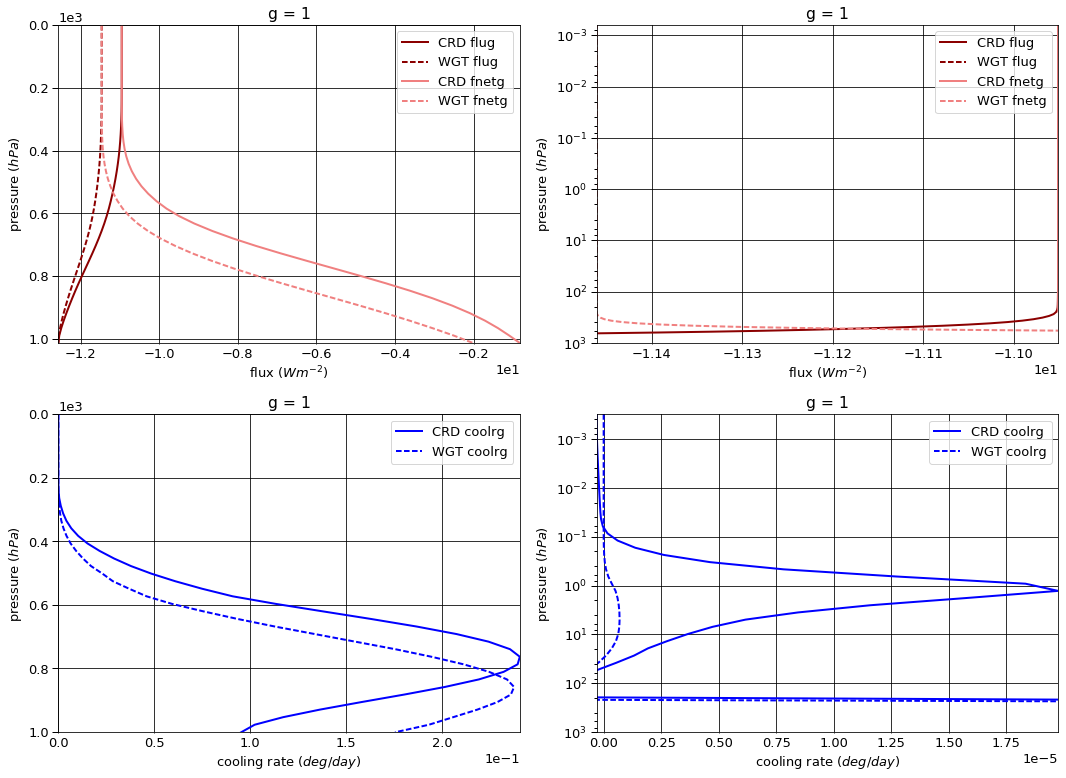

# Figure: flux, cooling rate g-group 2

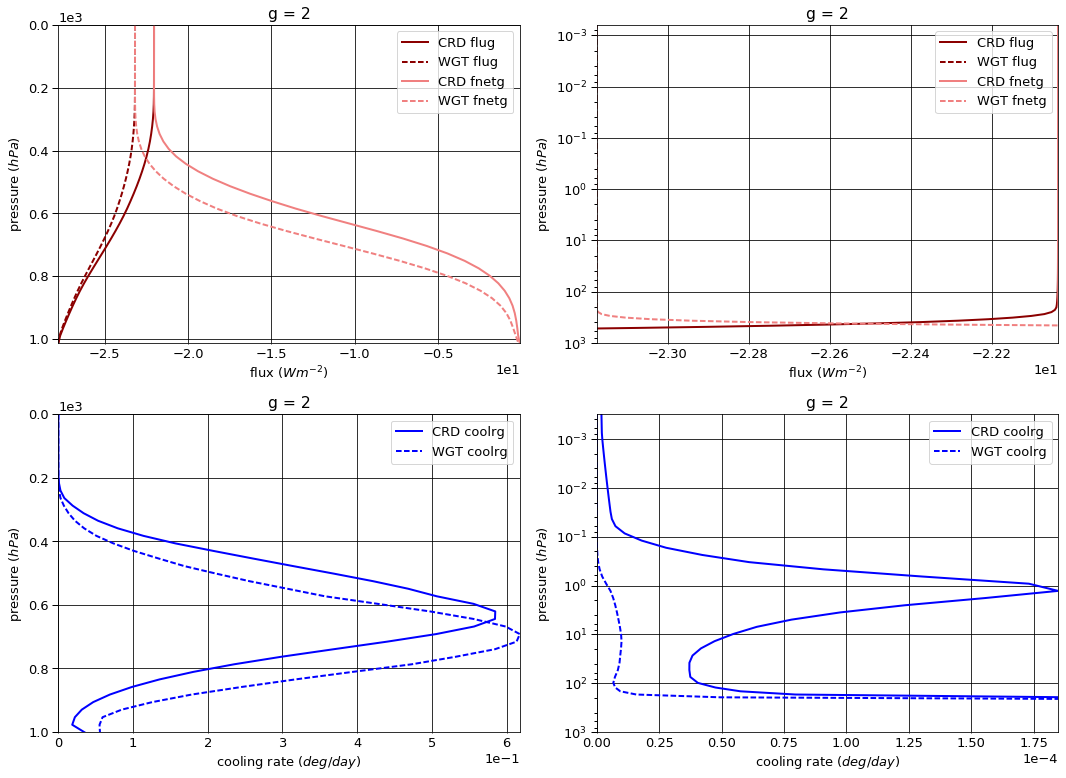

# Figure: flux, cooling rate g-group 3

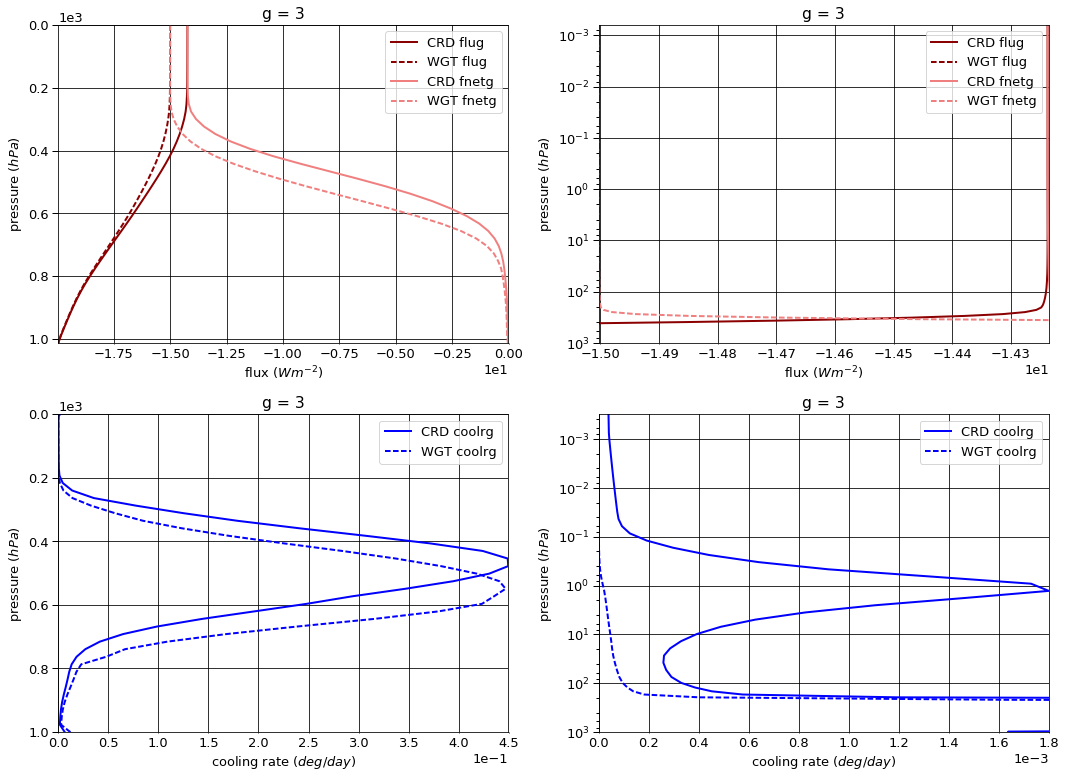

# Figure: flux, cooling rate g-group 4

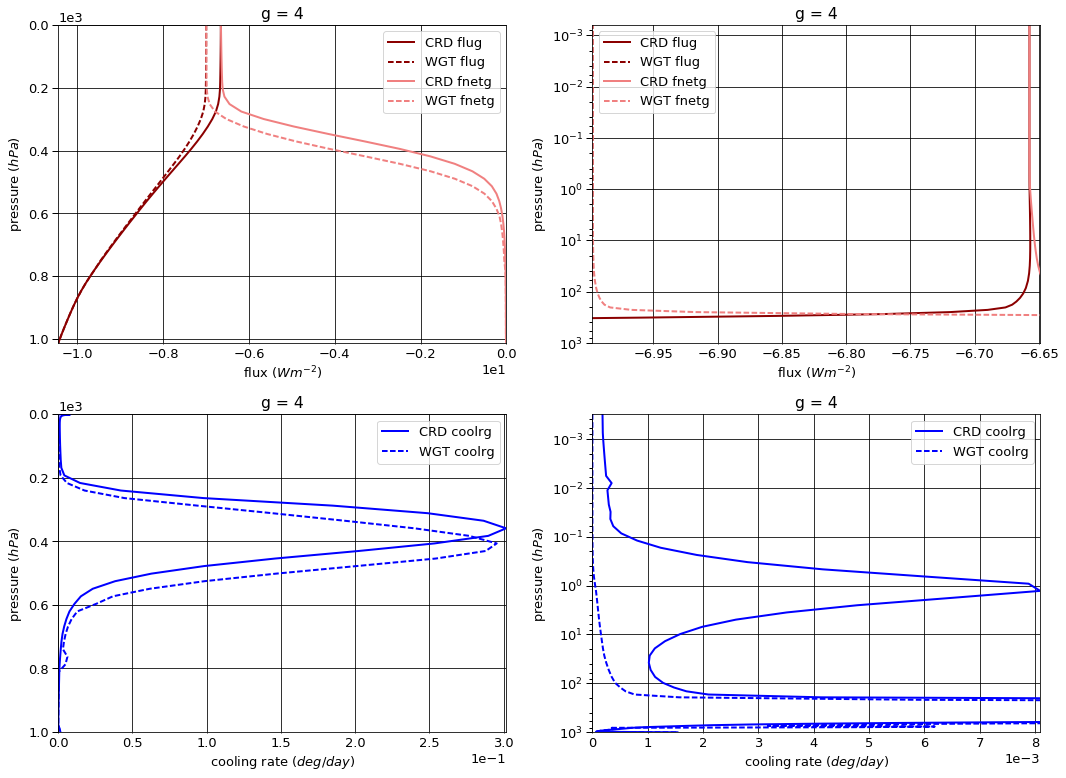

# Figure: flux, cooling rate g-group 5

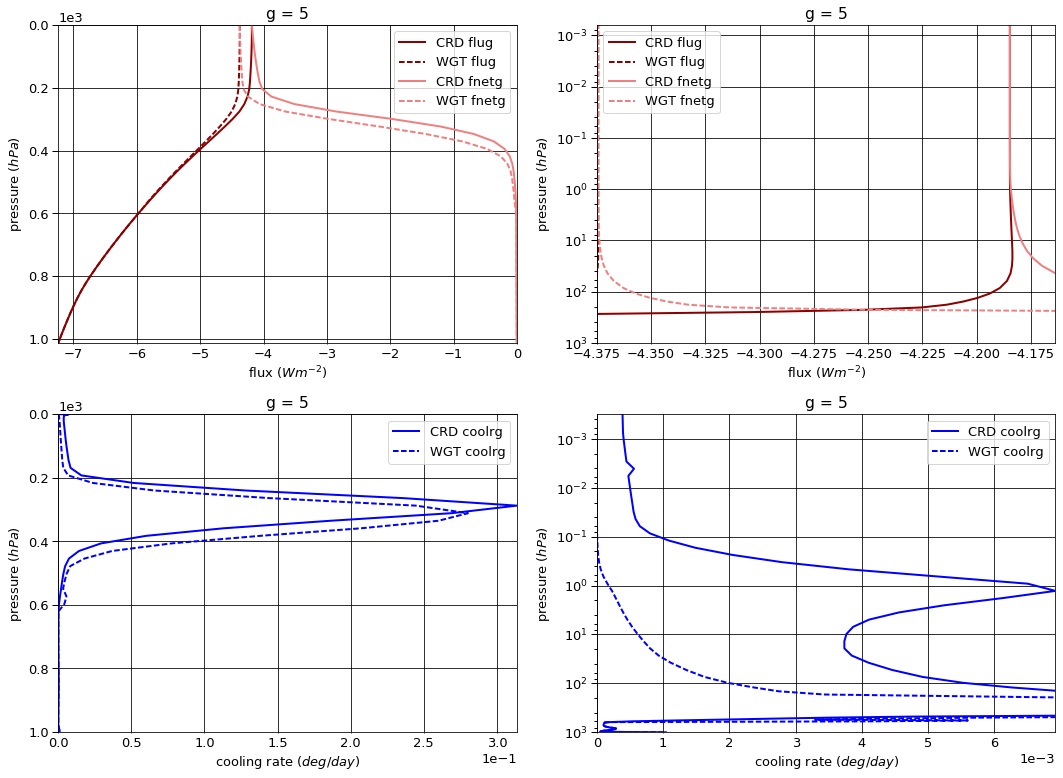

# Figure: flux, cooling rate g-group 6

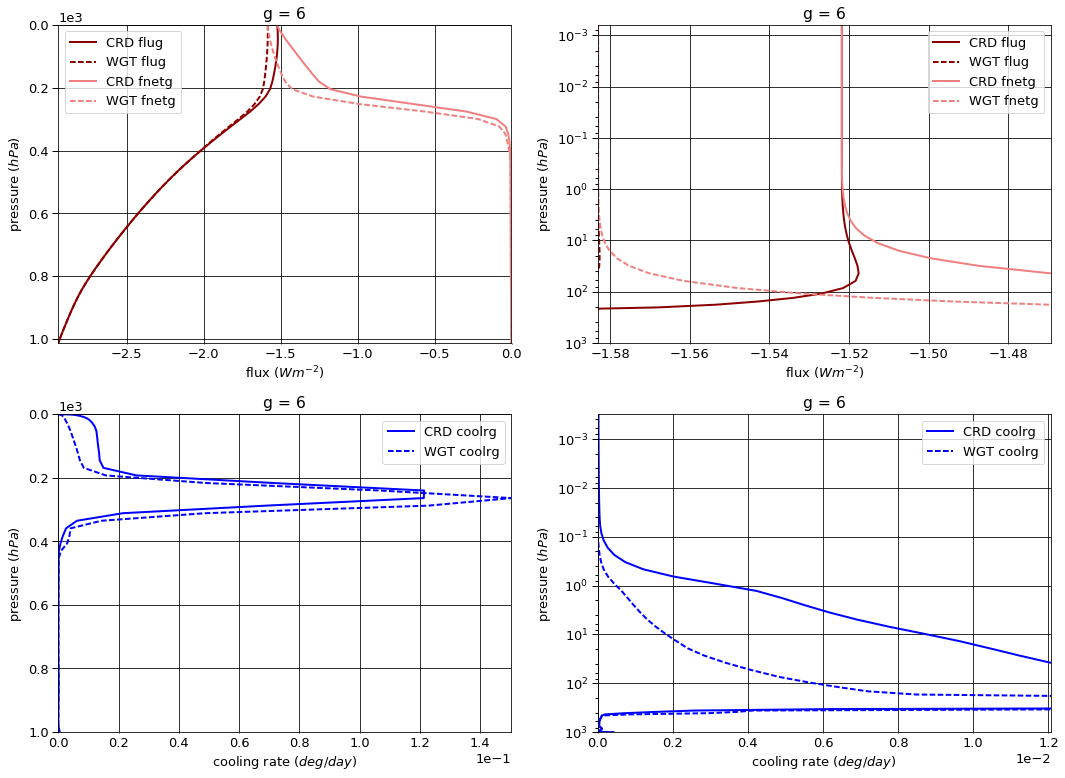

# Figure: flux, cooling rate g-group 7

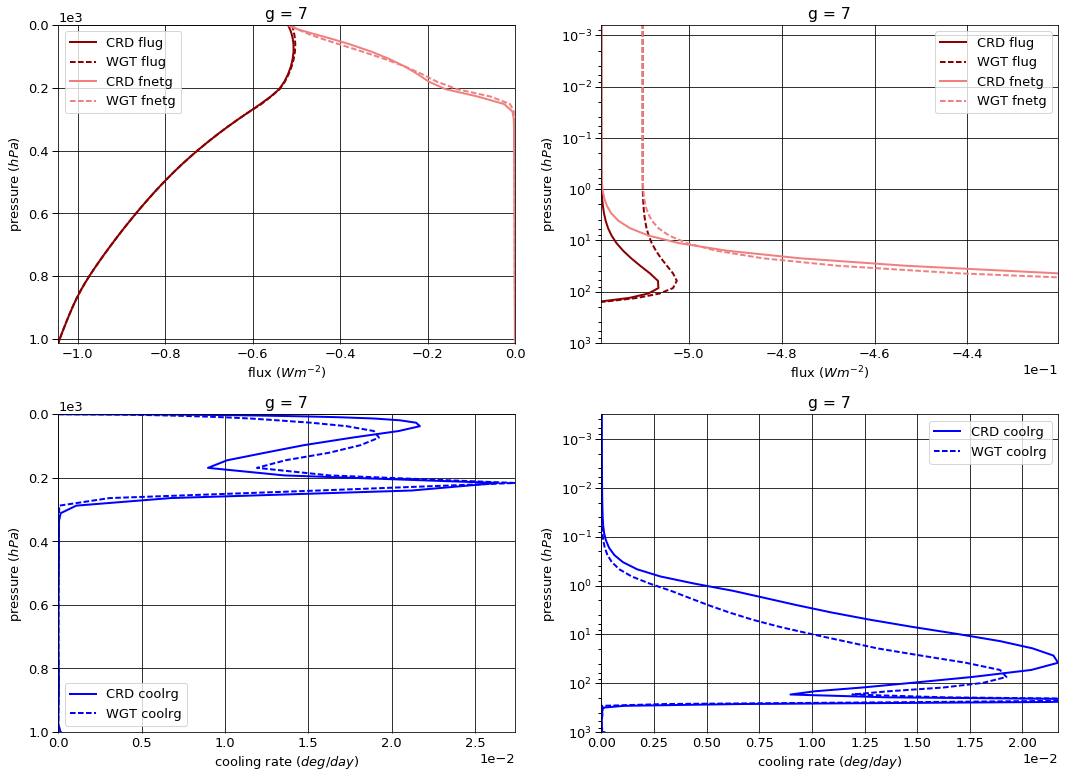

# Figure: flux, cooling rate g-group 8

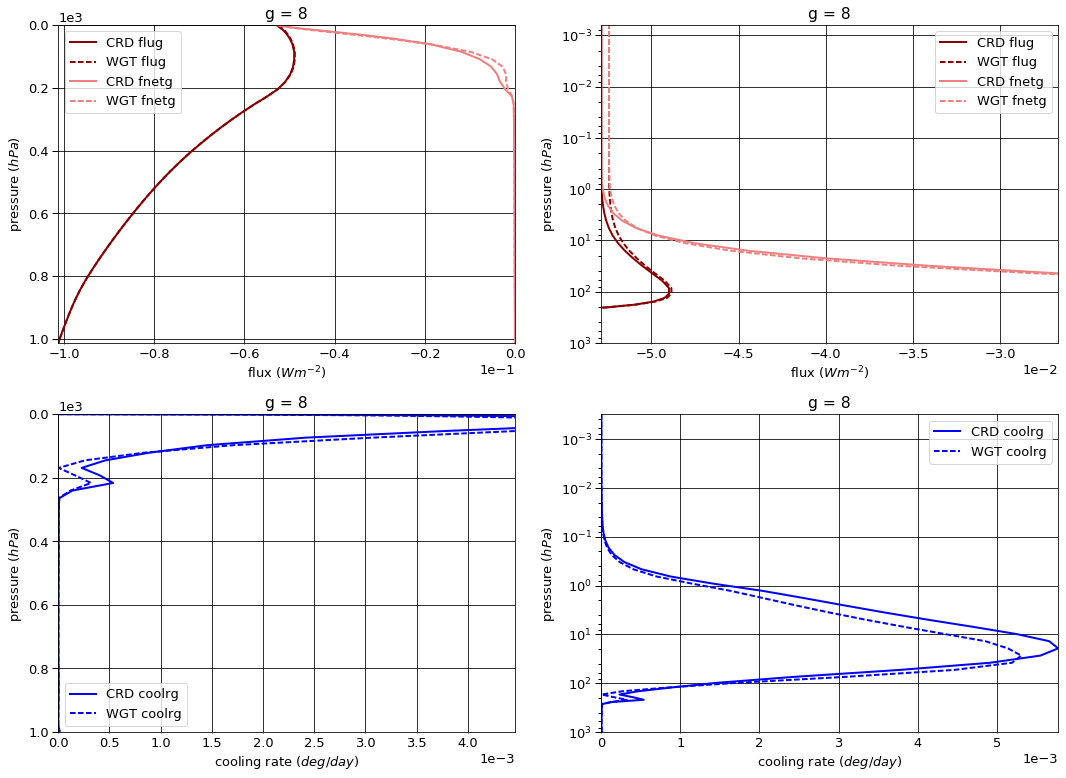

# Figure: flux, cooling rate g-group 9

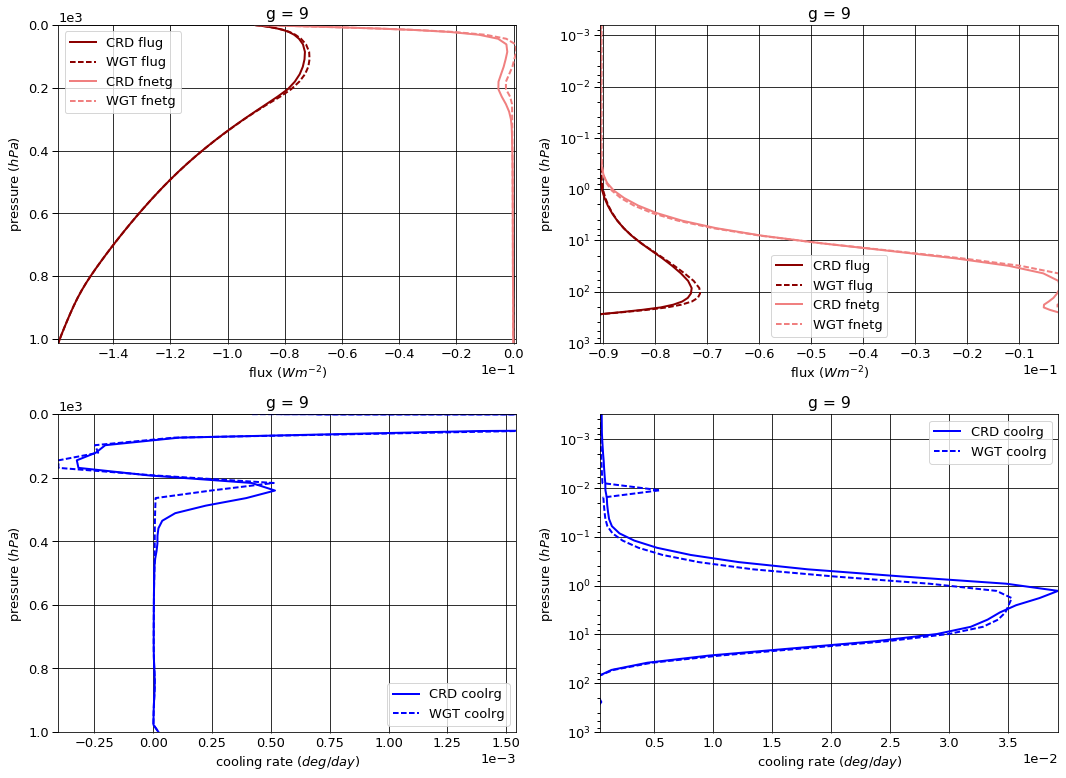

# Figure: flux, cooling rate g-group 10

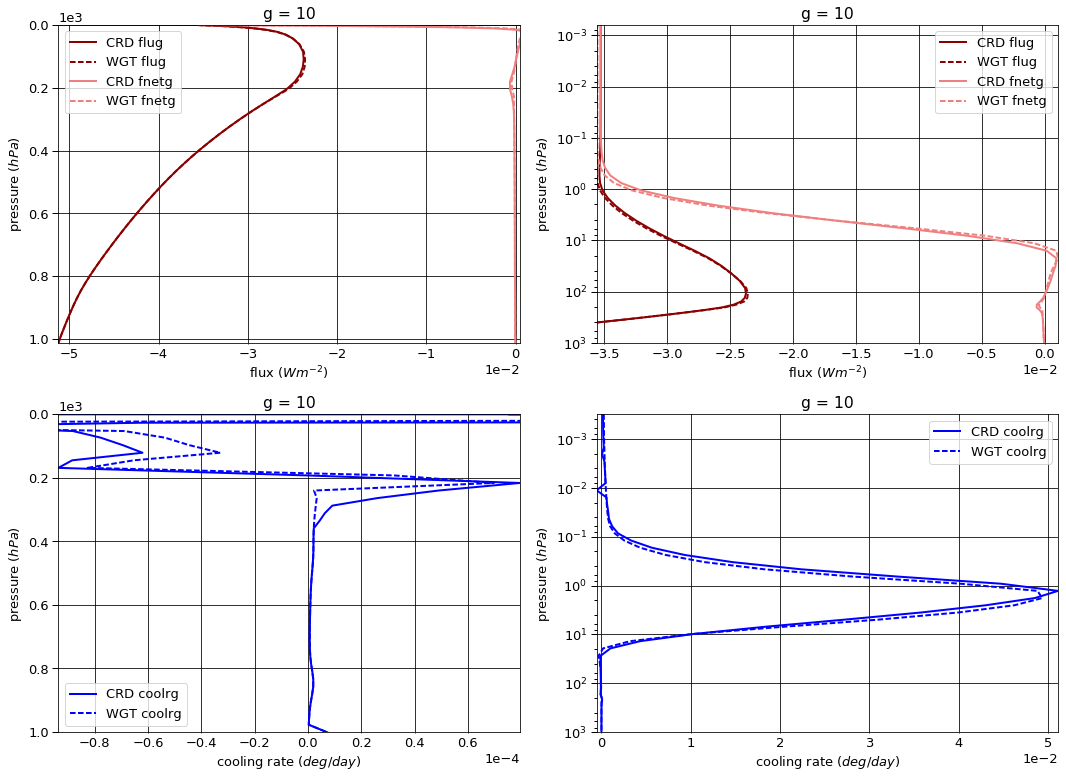

# Figure: flux, cooling rate g-group 11

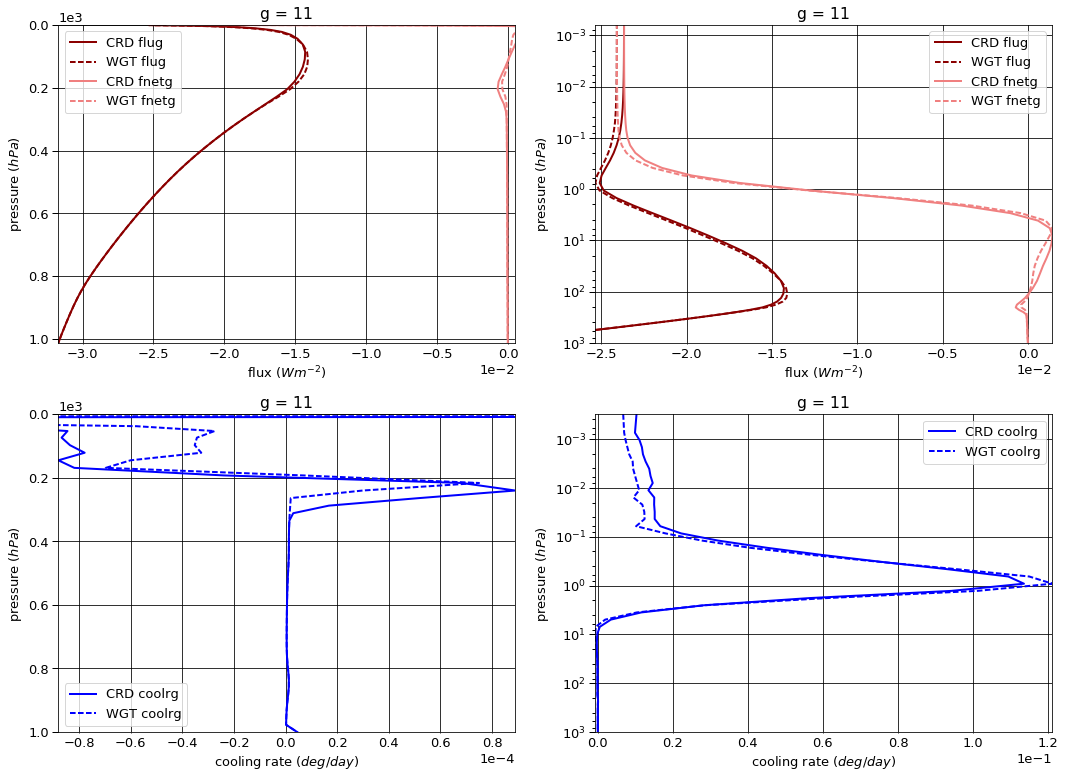

# Figure: flux, cooling rate g-group 12

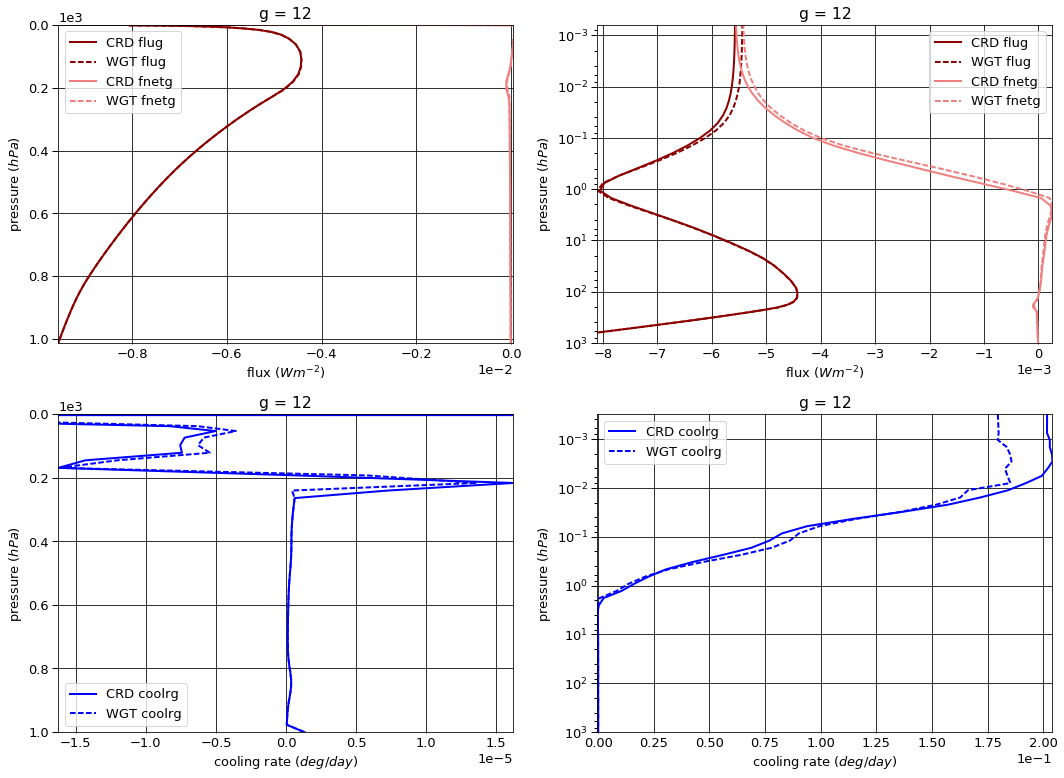

# Figure: flux, cooling rate g-group total

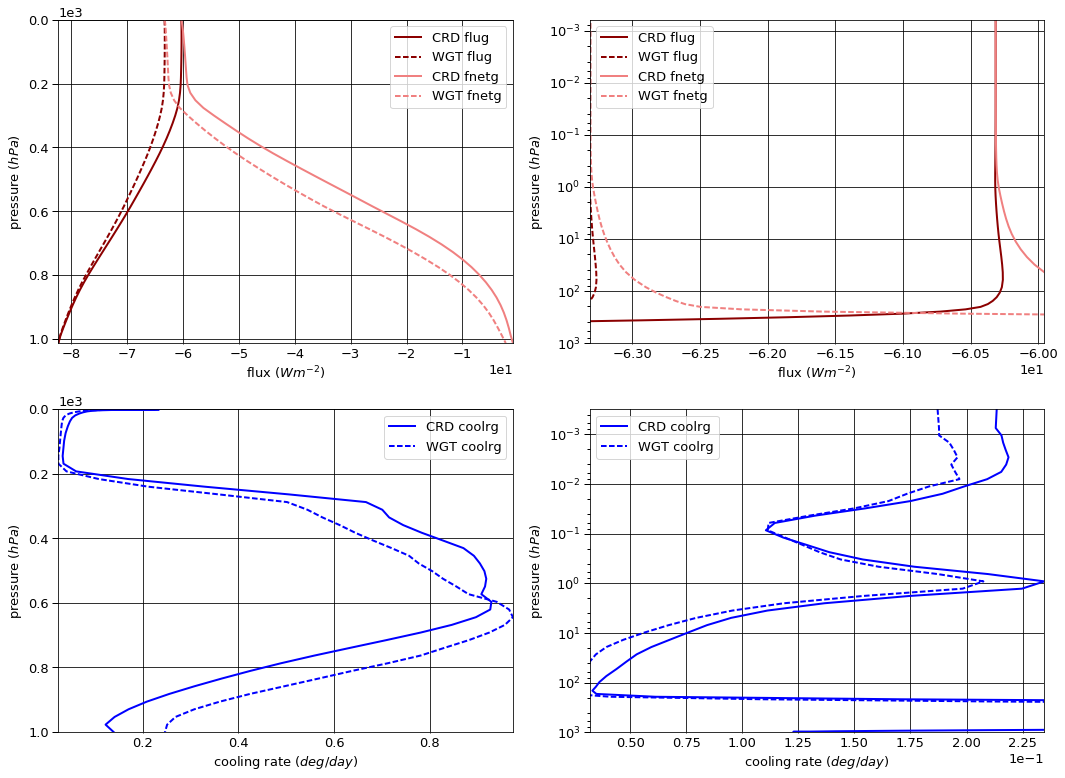

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -10.950705   0.000000 -10.950705
   1013.0   76    -12.564385  11.740218  -0.824167
2  0.0      1     -22.036004   0.000000 -22.036004
   1013.0   76    -27.772761  27.662196  -0.110565
3  0.0      1     -14.237389   0.000000 -14.237389
   1013.0   76    -19.955100  19.938238  -0.016862
4  0.0      1      -6.657488   0.000000  -6.657488
   1013.0   76    -10.445757  10.441500  -0.004257
5  0.0      1      -4.184708   0.000000  -4.184708
   1013.0   76     -7.237544   7.234662  -0.002882
6  0.0      1      -1.521795   0.000000  -1.521795
   1013.0   76     -2.943302   2.942119  -0.001183
7  0.0      1      -0.518849   0.000000  -0.518849
   1013.0   76     -1.044009   1.043605  -0.000404
8  0.0      1      -0.052862   0.000000  -0.052862
   1013.0   76     -0.101247   0.101209  -0.000038
9  0.0      1      -0.090502   0.000000  -0.090502
   1013.0   76     -0.159190   0.159126  -0.000064
10 0.0      1      -0.035288   0.000000  -0.035288
   1013.0   76     -0.051237   0.051217  -0.000020
11 0.0      1      -0.023655   0.000000  -0.023655
   1013.0   76     -0.031706   0.031693  -0.000013
12 0.0      1      -0.005567   0.000000  -0.005567
   1013.0   76     -0.009556   0.009553  -0.000004


WGT


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -11.460917   0.000000 -11.460917
   1013.0   76    -12.564385  10.552601  -2.011785
2  0.0      1     -23.176234   0.000000 -23.176234
   1013.0   76    -27.772761  27.576602  -0.196159
3  0.0      1     -15.002523   0.000000 -15.002523
   1013.0   76    -19.955100  19.923294  -0.031806
4  0.0      1      -6.996925   0.000000  -6.996925
   1013.0   76    -10.445757  10.441500  -0.004257
5  0.0      1      -4.374351   0.000000  -4.374351
   1013.0   76     -7.237544   7.234662  -0.002882
6  0.0      1      -1.583073   0.000000  -1.583073
   1013.0   76     -2.943302   2.942119  -0.001183
7  0.0      1      -0.509959   0.000000  -0.509959
   1013.0   76     -1.044009   1.043605  -0.000404
8  0.0      1      -0.052422   0.000000  -0.052422
   1013.0   76     -0.101247   0.101209  -0.000038
9  0.0      1      -0.090330   0.000000  -0.090330
   1013.0   76     -0.159190   0.159126  -0.000064
10 0.0      1      -0.035574   0.000000  -0.035574
   1013.0   76     -0.051237   0.051217  -0.000020
11 0.0      1      -0.024075   0.000000  -0.024075
   1013.0   76     -0.031706   0.031693  -0.000013
12 0.0      1      -0.005432   0.000000  -0.005432
   1013.0   76     -0.009556   0.009553  -0.000004


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.510212  0.000000 -0.510212
   1013.0   76     0.000000 -1.187617 -1.187617
2  0.0      1     -1.140230  0.000000 -1.140230
   1013.0   76     0.000000 -0.085594 -0.085594
3  0.0      1     -0.765134  0.000000 -0.765134
   1013.0   76     0.000000 -0.014944 -0.014944
4  0.0      1     -0.339438  0.000000 -0.339438
   1013.0   76     0.000000  0.000000  0.000000
5  0.0      1     -0.189643  0.000000 -0.189643
   1013.0   76     0.000000  0.000000  0.000000
6  0.0      1     -0.061278  0.000000 -0.061278
   1013.0   76     0.000000  0.000000  0.000000
7  0.0      1      0.008890  0.000000  0.008890
   1013.0   76     0.000000  0.000000  0.000000
8  0.0      1      0.000440  0.000000  0.000440
   1013.0   76     0.000000  0.000000  0.000000
9  0.0      1      0.000172  0.000000  0.000172
   1013.0   76     0.000000  0.000000  0.000000
10 0.0      1     -0.000286  0.000000 -0.000286
   1013.0   76     0.000000  0.000000  0.000000
11 0.0      1     -0.000420  0.000000 -0.000420
   1013.0   76     0.000000  0.000000  0.000000
12 0.0      1      0.000136  0.000000  0.000136
   1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.052952e-07
   1001.112500 75     9.529047e-02
2  0.000312    1      1.925339e-06
   1001.112500 75     3.510104e-02
3  0.000312    1      3.861231e-05
   1001.112500 75     6.603366e-03
4  0.000312    1      1.829606e-04
   1001.112500 75     1.537667e-03
5  0.000312    1      3.863440e-04
   1001.112500 75     1.041170e-03
6  0.000312    1      2.292733e-05
   1001.112500 75     4.274070e-04
7  0.000312    1      2.159111e-05
   1001.112500 75     1.459072e-04
8  0.000312    1      5.554436e-08
   1001.112500 75     1.356242e-05
9  0.000312    1      5.459254e-04
   1001.112500 75     2.327075e-05
10 0.000312    1      1.745608e-04
   1001.112500 75     7.240769e-06
11 0.000312    1      1.032887e-02
   1001.112500 75     4.660625e-06
12 0.000312    1      2.017774e-01
   1001.112500 75     1.338761e-06


WGT


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     1.755265e-01
2  0.000312    1     -9.606521e-11
   1001.112500 75     5.574091e-02
3  0.000312    1      1.200815e-10
   1001.112500 75     1.231273e-02
4  0.000312    1      8.765951e-10
   1001.112500 75     1.537667e-03
5  0.000312    1      4.635147e-09
   1001.112500 75     1.041170e-03
6  0.000312    1      1.416362e-08
   1001.112500 75     4.274070e-04
7  0.000312    1      1.032596e-07
   1001.112500 75     1.459072e-04
8  0.000312    1      4.194035e-08
   1001.112500 75     1.356242e-05
9  0.000312    1      4.200534e-04
   1001.112500 75     2.327075e-05
10 0.000312    1      2.653292e-04
   1001.112500 75     7.240769e-06
11 0.000312    1      6.781650e-03
   1001.112500 75     4.660625e-06
12 0.000312    1      1.796250e-01
   1001.112500 75     1.338761e-06


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      3.052952e-07
   1001.112500 75     8.023602e-02
2  0.000312    1     -1.925435e-06
   1001.112500 75     2.063987e-02
3  0.000312    1     -3.861219e-05
   1001.112500 75     5.709369e-03
4  0.000312    1     -1.829597e-04
   1001.112500 75     0.000000e+00
5  0.000312    1     -3.863394e-04
   1001.112500 75     0.000000e+00
6  0.000312    1     -2.291317e-05
   1001.112500 75     0.000000e+00
7  0.000312    1     -2.148785e-05
   1001.112500 75     0.000000e+00
8  0.000312    1     -1.360402e-08
   1001.112500 75     0.000000e+00
9  0.000312    1     -1.258720e-04
   1001.112500 75     0.000000e+00
10 0.000312    1      9.076844e-05
   1001.112500 75     0.000000e+00
11 0.000312    1     -3.547219e-03
   1001.112500 75     0.000000e+00
12 0.000312    1     -2.215249e-02
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314811,0.000000,-60.314811
1013.0,76,-82.315794,81.355336,-0.960459



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-63.311814,0.000000,-63.311814
1013.0,76,-82.315794,80.067181,-2.248614



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-2.997003,0.000000,-2.997003
1013.0,76,0.000000,-1.288155,-1.288155


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213481
1001.112500,75,0.140197



WGT


,,coolrg
pressure,layer,
0.000312,1,0.187092
1001.112500,75,0.246782



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.026389
1001.112500,75,0.106585


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.141550,0.145814
2,0.329975,0.334770
3,0.246500,0.244908
4,0.132400,0.129531
5,0.093475,0.090606
6,0.037650,0.036705
7,0.013825,0.013223
8,0.001400,0.001303
9,0.002025,0.001980


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,2.038066e-23
3,1.043964e-22
4,5.347525e-22
5,2.739177e-21
6,1.403096e-20
7,7.187115e-20
8,3.681475e-19
9,1.184411e-19


In [21]:
def spreadsheet():
    ng = 12
    ng_refs = [2, 2, 8]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.141550,0.145814,0.141550,0.145814,500.0
2,2.038066e-23,NaN,0.329975,0.334770,0.471525,0.480584,500.0
3,1.043964e-22,5.122326,0.246500,0.244908,0.718025,0.725492,500.0
4,5.347525e-22,5.122327,0.132400,0.129531,0.850425,0.855023,500.0
5,2.739177e-21,5.122327,0.093475,0.090606,0.943900,0.945629,500.0
6,1.403096e-20,5.122327,0.037650,0.036705,0.981550,0.982334,500.0
7,7.187115e-20,5.122326,0.013825,0.013223,0.995375,0.995557,500.0
8,3.681475e-19,5.122327,0.001400,0.001303,0.996775,0.996860,500.0
9,1.184411e-19,0.321722,0.002025,0.001980,0.998800,0.998840,10.0


In [23]:
def load_d_bigsum():
    
    ng = 12
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

load_d_bigsum()

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1310: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')